# Human Face Detection

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivpoojansingh123","key":"c7d55648ac917d161a350996494d3a1a"}'}

## Download dataset

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes")

Dataset URL: https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes


100%|██████████| 309M/309M [00:01<00:00, 314MB/s]


In [ ]:
# Create directory
train_dir = "/content/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train"
test_dir = "/content/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/test"

In [ ]:
len(train_dir), len(test_dir)

(74, 73)

## Data Preprocessing

In [ ]:
# Check images in every directory
import os
print("Training set distribution:")
for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    if os.path.isdir(cls_path):
        print(f"{cls}: {len(os.listdir(cls_path))} images")

print("\nTest set distribution:")
for cls in os.listdir(test_dir):
    cls_path = os.path.join(test_dir, cls)
    if os.path.isdir(cls_path):
        print(f"{cls}: {len(os.listdir(cls_path))} images")


Training set distribution:
sad: 2255 images
angry: 1525 images
happy: 3019 images

Test set distribution:
sad: 757 images
angry: 515 images
happy: 1006 images


In [ ]:
# Create input for model and resize
img_size = (224, 224)
batch_size = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 batch_size=batch_size,
                                                                 image_size=img_size)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size=batch_size,
                                                                image_size=img_size)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

Found 6799 files belonging to 3 classes.
Found 2278 files belonging to 3 classes.


In [ ]:
train_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Number of class in datasets
class_name = train_data.class_names

## Visualization

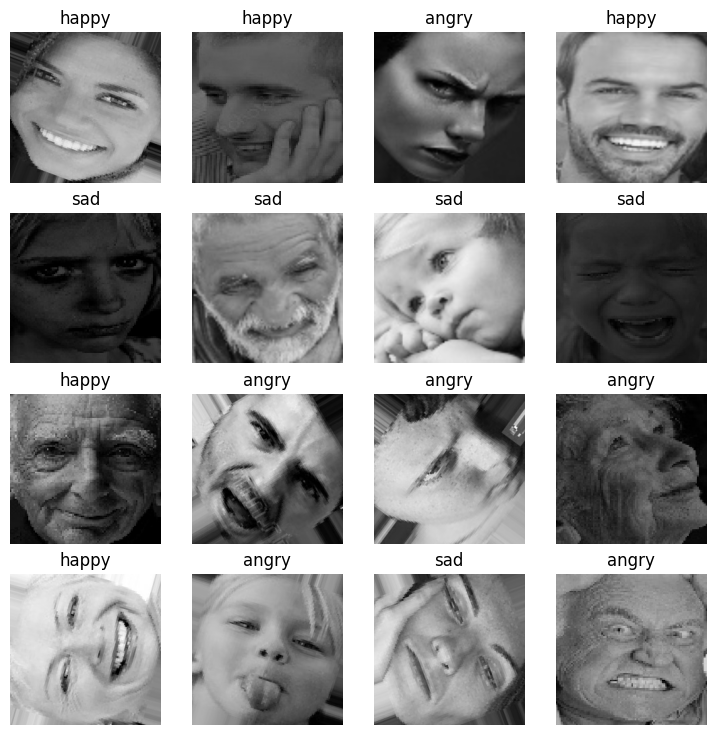

In [ ]:
plt.figure(figsize = (9,9))

for images, labels in train_data.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title(class_name[labels[i].numpy()])
    plt.axis("off")

# Confusion Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, class_names, normalize=False, figsize=(8,6)):
    """
    Plots a confusion matrix for emotion detection.
    """
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # If y_pred contains probabilities, convert to class indices
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    # If y_true is one-hot encoded, convert to class indices
    if y_true.ndim > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Emotion")
    plt.ylabel("True Emotion")
    plt.title("Confusion Matrix for Emotion Detection")
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))


# Model

# Model 0

In [ ]:
from tensorflow.keras import layers

In [ ]:
model_0 = tf.keras.models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    1

    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(3, activation="softmax")
])

In [ ]:
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,119,107 (19.53 MB)

 Trainable params: 5,118,339 (19.52 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
model_0.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [ ]:
history_0 = model_0.fit(train_data, epochs=15, validation_data=test_data, validation_split=0.2, verbose=1)

Epoch 1/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 22s 104ms/step - accuracy: 0.5485 - loss: 0.9660 - val_accuracy: 0.4491 - val_loss: 1.0569
Epoch 2/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.6420 - loss: 0.7974 - val_accuracy: 0.5386 - val_loss: 0.9297
Epoch 3/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.6946 - loss: 0.7142 - val_accuracy: 0.6519 - val_loss: 0.7708
Epoch 4/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.7433 - loss: 0.5994 - val_accuracy: 0.7366 - val_loss: 0.6433
Epoch 5/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.7911 - loss: 0.5139 - val_accuracy: 0.6958 - val_loss: 0.7589
Epoch 6/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.8399 - loss: 0.4037 - val_accuracy: 0.7423 - val_loss: 0.6752
Epoch 7/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.8691 - loss: 0.3427 - val_accuracy: 0.7687 - val_loss: 0.6728
Epoch 8/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.9084 - loss: 0.2619 -

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))



  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

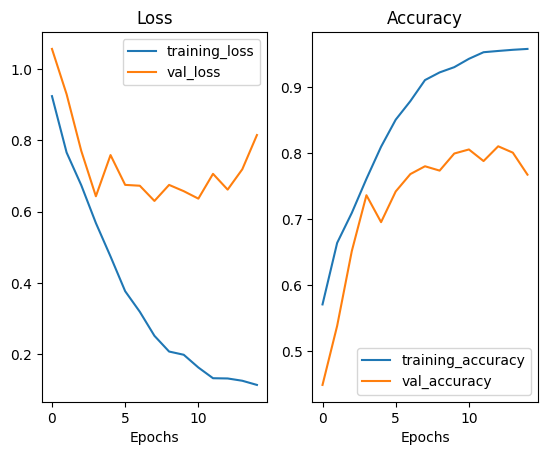

In [ ]:
plot_loss_curves(history_0)

In [ ]:
model_0.predict(test_data)

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


array([[0.40978712, 0.4563384 , 0.13387454],
       [0.00455296, 0.9725568 , 0.0228902 ],
       [0.276439  , 0.5337308 , 0.18983012],
       ...,
       [0.01867661, 0.00552764, 0.9757958 ],
       [0.01347878, 0.17053992, 0.8159813 ],
       [0.02139201, 0.01797043, 0.96063757]], dtype=float32)

In [ ]:
loss, acc = model_0.evaluate(test_data)
print(f"Test Accuracy: {acc:.2%}")

In [ ]:
import cv2

test_image = cv2.imread("/content/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/test/angry/101071.jpg_rotation_1.jpg")
test_image = cv2.resize(test_image, (224, 224))

img = tf.constant(test_image)
img = tf.expand_dims(img, axis=0)

model_0.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


array([[0., 1., 0.]], dtype=float32)

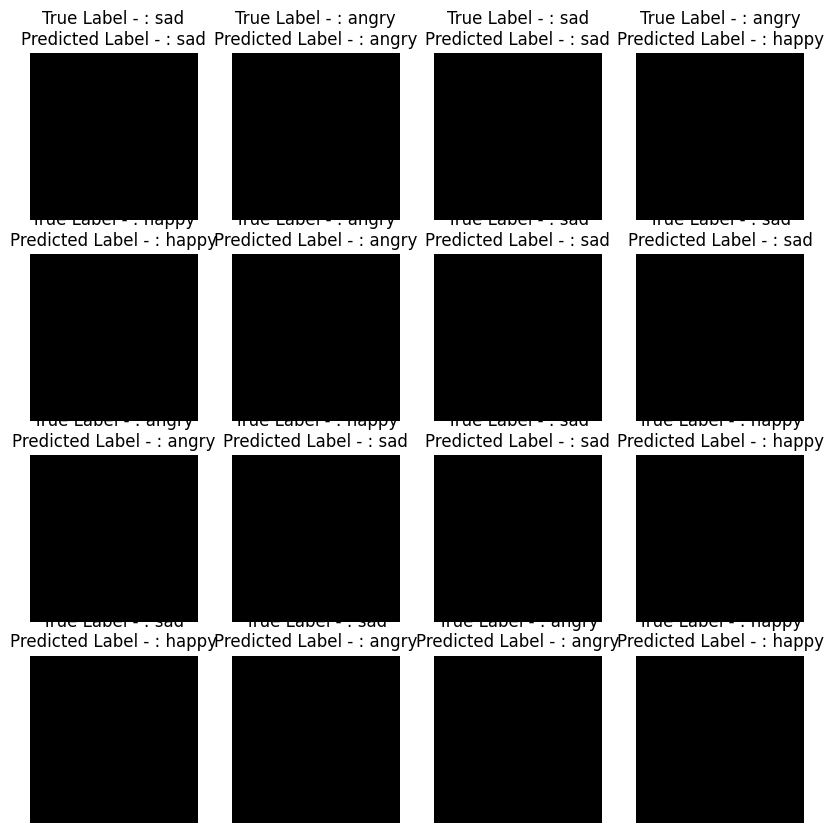

In [ ]:
plt.figure(figsize = (10,10))

for images, labels in test_data.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)

    plt.title("True Label - : " + class_name[labels[i].numpy()]
              + "\n" + "Predicted Label - : "
              + class_name[int(tf.argmax(model_0(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])] )
    plt.axis("off")

In [ ]:
loss, acc = model_0.evaluate(test_data)
print(f"Test Accuracy: {acc:.2%}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7722 - loss: 0.7772
Test Accuracy: 76.78%


In [ ]:
pred_probs = model_0.predict(test_data, verbose=1)

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


In [ ]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([2, 2, 2, 0, 1, 2, 1, 1, 2, 1])

In [ ]:
# Collect labels from test_data
y_labels_list = []
for _, labels in test_data.unbatch():
    y_labels_list.append(labels.numpy())  # each label is one-hot encoded

# Convert to array
y_labels = np.array(y_labels_list)

# If labels are one-hot encoded, convert to class indices
if y_labels.ndim > 1 and y_labels.shape[1] > 1:
    y_labels = np.argmax(y_labels, axis=1)

print("Unique labels in test set:", np.unique(y_labels))

Unique labels in test set: [0 1 2]


In [ ]:
model_0.save("model_0.h5")

In [ ]:
print("Unique in y_true:", np.unique(y_labels))
print("Unique in y_pred:", np.unique(pred_classes))
print("Class names:", class_name)

Unique in y_true: [0 1 2]
Unique in y_pred: [0 1 2]
Class names: ['angry', 'happy', 'sad']


# Model 1

## TranferLearning with efficientNet Model

In [ ]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# OLD
# base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNetV2
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_1 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)


In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=15,
                        validation_data=test_data,
                         )

Epoch 1/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.4418 - loss: 1.0637 - val_accuracy: 0.4416 - val_loss: 1.0633
Epoch 2/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.4444 - loss: 1.0625 - val_accuracy: 0.4416 - val_loss: 1.0633
Epoch 3/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.4448 - loss: 1.0632 - val_accuracy: 0.4416 - val_loss: 1.0634
Epoch 4/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.4443 - loss: 1.0632 - val_accuracy: 0.4416 - val_loss: 1.0631
Epoch 5/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.4466 - loss: 1.0621 - val_accuracy: 0.4416 - val_loss: 1.0630
Epoch 6/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.4440 - loss: 1.0657 - val_accuracy: 0.4416 - val_loss: 1.0630
Epoch 7/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.4449 - loss: 1.0629 - val_accuracy: 0.4416 - val_loss: 1.0633
Epoch 8/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.4437 - loss: 1.0634 - 

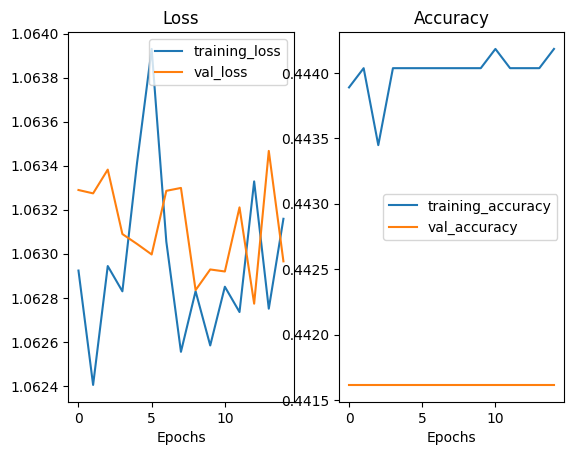

In [ ]:
plot_loss_curves(history_1)

In [ ]:
pred_probs = model_1.predict(test_data, verbose=1)

72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step


In [ ]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
def predict_image(model, data):
  plt.figure(figsize = (10,10))

  for images, labels in data.take(1):
   for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)

    plt.title("True Label - : " + class_name[labels[i].numpy()]
              + "\n" + "Predicted Label - : "
              + class_name[int(tf.argmax(model(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])] )
    plt.axis("off")

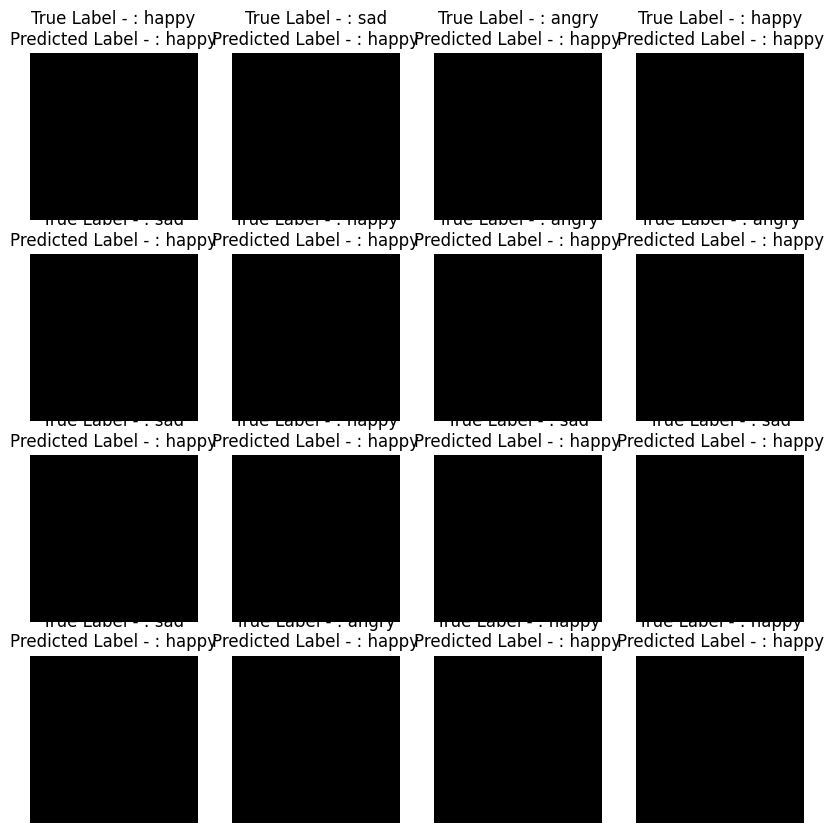

In [ ]:
predict_image(model_0, test_data)

In [ ]:
pred_probs = model_0.predict(test_data)
pred_classes = np.argmax(pred_probs, axis=1)

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


# Model 2

## Data Augmentation

In [ ]:
data_augmentation = tf.keras.models.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2)
], name ="data_augmentation")

In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(3, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)))

Epoch 1/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 86s 315ms/step - accuracy: 0.4215 - loss: 1.0841 - val_accuracy: 0.4167 - val_loss: 1.0790
Epoch 2/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 69s 268ms/step - accuracy: 0.4394 - loss: 1.0708 - val_accuracy: 0.4115 - val_loss: 1.0742
Epoch 3/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 71s 217ms/step - accuracy: 0.4338 - loss: 1.0717 - val_accuracy: 0.3524 - val_loss: 1.0907
Epoch 4/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 46s 215ms/step - accuracy: 0.4328 - loss: 1.0728 - val_accuracy: 0.4115 - val_loss: 1.0947
Epoch 5/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 82s 214ms/step - accuracy: 0.4390 - loss: 1.0689 - val_accuracy: 0.4253 - val_loss: 1.0682


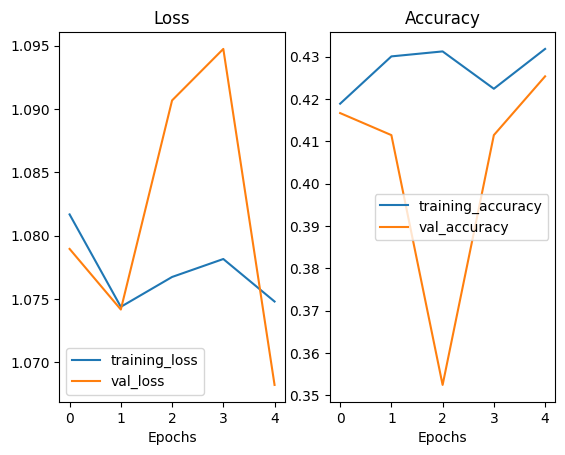

In [ ]:
plot_loss_curves(history_2)

In [ ]:
pred_probs = model_2.predict(test_data, verbose=1)
pred_classes = np.argmax(pred_probs, axis=1)

72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step


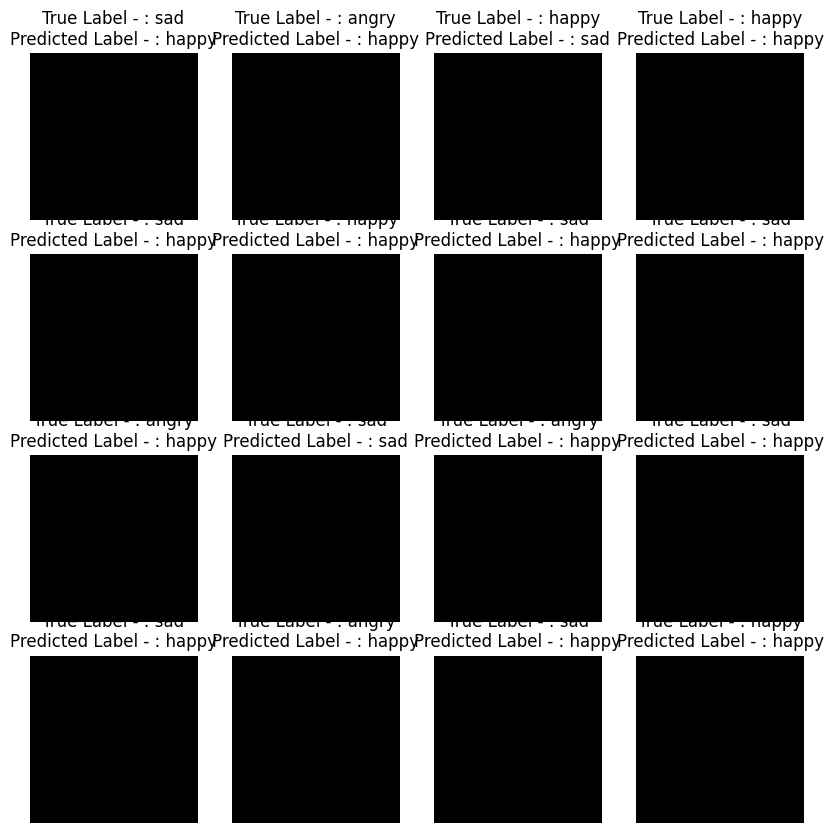

In [ ]:
predict_image(model_2, test_data)

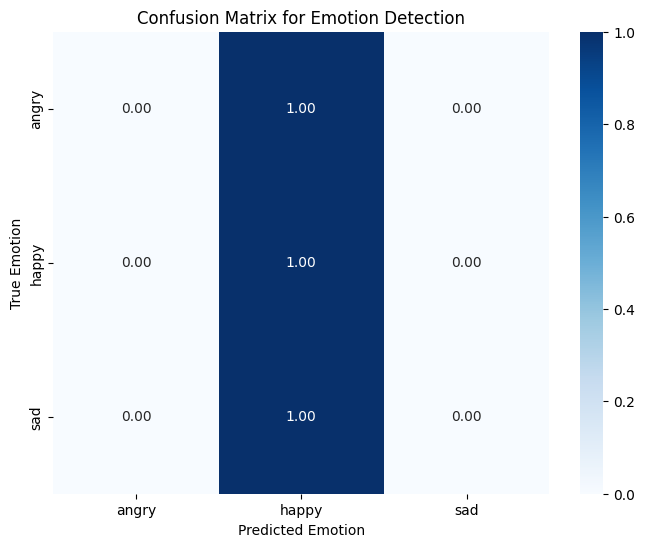


Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       515
       happy       0.44      1.00      0.61      1006
         sad       0.00      0.00      0.00       757

    accuracy                           0.44      2278
   macro avg       0.15      0.33      0.20      2278
weighted avg       0.20      0.44      0.27      2278



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
plot_confusion_matrix(y_true=y_labels, y_pred=pred_classes, class_names=class_name, normalize=True)

In [ ]:
loss, acc = model_2.evaluate(test_data)
print(f"Test Accuracy: {acc:.2%}")


72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.4292 - loss: 1.0661
Test Accuracy: 44.16%


# Resenet MOdel

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

In [ ]:
base_model = ResNet50(
    weights='imagenet',    # Pre-trained on ImageNet
    include_top=False,     # Remove the fully connected layers
    input_shape=(224, 224, 3)
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert features to a vector
x = Dropout(0.5)(x)              # Regularization
x = Dense(128, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # 3 classes: sad, angry, happy

model_3 = Model(inputs=base_model.input, outputs=output)


In [ ]:
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',  # or categorical if one-hot labels
    metrics=['accuracy']
)

In [ ]:
history = model_3.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 46s 157ms/step - accuracy: 0.3925 - loss: 1.1490 - val_accuracy: 0.3323 - val_loss: 1.0845
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step - accuracy: 0.4162 - loss: 1.0926 - val_accuracy: 0.3323 - val_loss: 1.0779
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.4284 - loss: 1.0781 - val_accuracy: 0.3319 - val_loss: 1.0706
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.4403 - loss: 1.0693 - val_accuracy: 0.4399 - val_loss: 1.0641
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 46s 125ms/step - accuracy: 0.4354 - loss: 1.0651 - val_accuracy: 0.4561 - val_loss: 1.0545
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 27s 126ms/step - accuracy: 0.4420 - loss: 1.0641 - val_accuracy: 0.4526 - val_loss: 1.0515
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 36s 104ms/step - accuracy: 0.4397 - loss: 1.0605 - val_accuracy: 0.4543 - val_loss: 1.0498
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.4448 - loss: 1

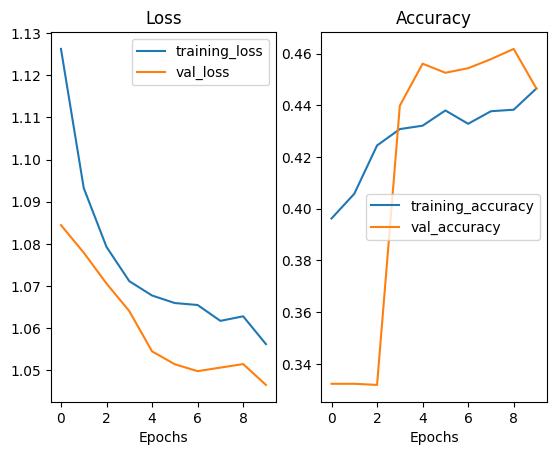

In [ ]:
plot_loss_curves(history)

In [ ]:
pred_probs = model_3.predict(test_data, verbose=1)
pred_classes = np.argmax(pred_probs, axis=1)

72/72 ━━━━━━━━━━━━━━━━━━━━ 17s 163ms/step


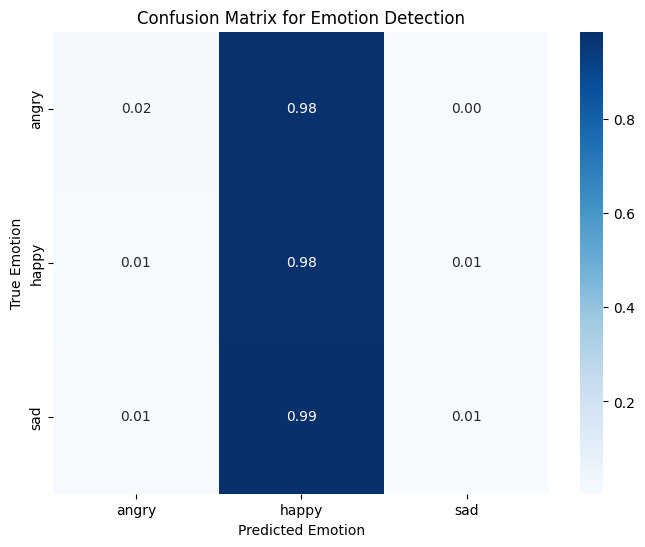


Classification Report:
              precision    recall  f1-score   support

       angry       0.32      0.02      0.04       515
       happy       0.44      0.98      0.61      1006
         sad       0.33      0.01      0.01       757

    accuracy                           0.44      2278
   macro avg       0.37      0.33      0.22      2278
weighted avg       0.38      0.44      0.28      2278



In [ ]:
plot_confusion_matrix(y_true=y_labels, y_pred=pred_classes, class_names=class_name, normalize=True)

In [ ]:
loss, acc = model_3.evaluate(test_data)
print(f"Test Accuracy: {acc:.2%}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.4405 - loss: 1.0457
Test Accuracy: 44.64%
